<h1 style="color: #210e9c;">Final Project: <br> Pension Funds and reforms<br>OECD countries 2005-2020</h1>

---

**This project** delves into a OECD private pensions information, spanning fifteen years from 2005 to 2020. This project encompasses computational tasks such as data loading, visualization, and regression models for predicting pension funds assets at the country level.

I use 6 types of regression models:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree Regression
5. K-Nearest Regression
6. Gradient Boosting Regression (XGBoost)

For each of them, I report the following regression metrics:
1. Coefficient of determination ($R^{2}$)
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)
4. Root Mean Squared Error (RMSE)

Finally, I report 

<h2 style="color: #1460db;">00 | Setup</h2>

<h3 style="color: #14a9db;">Libraries</h3>

In [1]:
# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings
import os # what does os does? 
import shutil #copies directory to new location
import kagglehub 

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
#from sklearn.linear_model import LogisticRegression 
#from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import classification_report 

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
# 🔧 Basic functions
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [4]:
os.getcwd()

'/Users/saraynes.gs/Documents/Ironhack/Bootcamp/Labs/W9/Notebooks'

<h2 style="color: #1460db;">01 | Data Extraction</h2>

In [5]:
data = pd.read_csv("../Data/df_qog_reforms.csv")

<h3 style="color: #14a9db;">Exploring the data</h3>

In [6]:
open_data(data)

Data shape is (275, 50).

ccodealp_year                        object
wdi_gdpgr                           float64
wdi_gdpcapcon2015                   float64
wdi_gdpcappppcon2017                float64
wdi_inflation                       float64
wdi_fertility                       float64
oecd_houswealth_t1a                 float64
oecd_houswealth_t1f                 float64
oecd_emplage_t1a                    float64
wdi_lfpyne                          float64
oecd_taxapw_t1                      float64
kun_wiqreco_all                     float64
nrmi_nrpi                           float64
kun_wiqreco_full                    float64
OECD_PPA                            float64
OECD_PFA_USD                        float64
OECD_PFA_PC_GDP                     float64
country                              object
ccodealp_y                           object
year                                  int64
benefits_expand                       int64
benefits_contract                     int64
benefi

,ccodealp_year,wdi_gdpgr,wdi_gdpcapcon2015,wdi_gdpcappppcon2017,wdi_inflation,wdi_fertility,oecd_houswealth_t1a,oecd_houswealth_t1f,oecd_emplage_t1a,wdi_lfpyne,oecd_taxapw_t1,kun_wiqreco_all,nrmi_nrpi,kun_wiqreco_full,OECD_PPA,OECD_PFA_USD,OECD_PFA_PC_GDP,country,ccodealp_y,year,benefits_expand,benefits_contract,benefits_both,contributions_expand,contributions_contract,contributions_both,coverage_expand,coverage_contract,coverage_both,diversificationsecurity_expand,diversificationsecurity_contract,diversificationsecurity_both,fees_expand,fees_contract,fees_both,taxes_expand,taxes_contract,taxes_both,onlybenefits,onlycontributions,onlycoverage,onlyds,onlyfees,onlytaxes,morethantwo,morethanoneincludingtaxes,morethanonenottaxes,morethanoneyear,investment,reforms
50,COL21,11.016193,6423.859895,14661.213244,3.495058,1.717,NaN,NaN,NaN,48.35,NaN,NaN,86.015628,NaN,92187.933,92187.933,30.775,Colombia,COL,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
133,ITA05,0.817849,33257.769803,44260.827417,1.985293,1.340,23.40794,4.996476,25.67500,33.85,45.904517,32.0,NaN,25.0,55899.781,47004.761,2.668,Italy,ITA,2005,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
17,CAN10,3.089919,41156.145186,44862.419496,1.776872,1.650,22.90635,NaN,54.88334,65.58,30.391521,8.0,52.851293,7.0,2068887.311,1054138.669,62.930,Canada,CAN,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
234,ESP01,3.933003,24707.367074,35873.871878,3.589834,1.230,39.71091,6.969842,34.00000,42.38,38.858001,18.0,NaN,18.0,46077.713,34513.268,5.587,Spain,ESP,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
193,NLD16,2.191714,45938.785044,53847.826555,0.316667,1.660,16.45268,59.337010,60.82500,68.20,37.245227,NaN,99.773128,NaN,1360624.901,1360624.901,182.229,Netherlands,NLD,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


<h3 style="color: #14a9db;">Column names standarization</h3>

In [7]:
snake_columns(data)
data.head()

,ccodealp_year,wdi_gdpgr,wdi_gdpcapcon2015,wdi_gdpcappppcon2017,wdi_inflation,wdi_fertility,oecd_houswealth_t1a,oecd_houswealth_t1f,oecd_emplage_t1a,wdi_lfpyne,oecd_taxapw_t1,kun_wiqreco_all,nrmi_nrpi,kun_wiqreco_full,oecd_ppa,oecd_pfa_usd,oecd_pfa_pc_gdp,country,ccodealp_y,year,benefits_expand,benefits_contract,benefits_both,contributions_expand,contributions_contract,contributions_both,coverage_expand,coverage_contract,coverage_both,diversificationsecurity_expand,diversificationsecurity_contract,diversificationsecurity_both,fees_expand,fees_contract,fees_both,taxes_expand,taxes_contract,taxes_both,onlybenefits,onlycontributions,onlycoverage,onlyds,onlyfees,onlytaxes,morethantwo,morethanoneincludingtaxes,morethanonenottaxes,morethanoneyear,investment,reforms
0,AUS03,3.111398,48453.013801,40642.562284,2.732596,1.748,19.47675,46.42478,61.81840,70.22,28.246566,14.0,NaN,14.0,358915.039,358915.039,66.997,Austria,AUT,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,AUS06,2.740636,51605.314602,43286.723537,3.555288,1.908,16.57807,51.17390,63.69736,70.80,28.281561,11.0,NaN,9.0,678162.183,645868.776,86.987,Australia,AUS,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,AUS08,3.568270,53382.310059,44777.273719,4.350299,1.984,21.78497,49.43645,64.51452,70.75,26.931992,9.0,NaN,8.0,1095339.382,1058376.109,93.245,Australia,AUS,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,AUS09,1.870487,53271.590189,44684.401494,1.771117,1.971,20.57404,53.02210,61.18265,69.10,26.748796,9.0,NaN,8.0,867428.773,839274.965,82.010,Australia,AUS,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,2
4,AUS10,2.206566,53606.581445,44965.393364,2.918340,1.928,21.59504,53.17834,60.52081,68.43,26.829039,13.0,60.86891,12.0,1017081.539,986838.568,88.791,Australia,AUS,2010,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,3


<h3 style="color: #14a9db;">Copy to a new dataframe as best practice</h3>

In [8]:
df = data.copy()

<h2 style="color: #1460db;">02 | Data Cleaning</h2>

<h3 style="color: #14a9db;">Changing the index</h3>

In [9]:
df = df.set_index("ccodealp_year")

<h3 style="color: #14a9db;">Exploring with duplicates, NaN and empty spaces</h3>

In [10]:
explore_data(df)
 

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
wdi_gdpgr,0,0
wdi_gdpcapcon2015,0,0
wdi_gdpcappppcon2017,0,0
wdi_inflation,0,0
wdi_fertility,1,0
oecd_houswealth_t1a,82,0
oecd_houswealth_t1f,99,0
oecd_emplage_t1a,44,0
wdi_lfpyne,0,0
oecd_taxapw_t1,48,0


In [11]:
df = df.drop(columns=['oecd_houswealth_t1a', 'oecd_houswealth_t1f', 'oecd_emplage_t1a', 'oecd_taxapw_t1', 'kun_wiqreco_all', 'nrmi_nrpi', 'kun_wiqreco_full'])
df = df.dropna(subset=['wdi_fertility'])

<h3 style="color: #14a9db;">Moving the target to the right of the DF</h3>

In [12]:
target = df.pop("oecd_pfa_pc_gdp")
df["oecd_pfa_pc_gdp"] = target
df.head()

,wdi_gdpgr,wdi_gdpcapcon2015,wdi_gdpcappppcon2017,wdi_inflation,wdi_fertility,wdi_lfpyne,oecd_ppa,oecd_pfa_usd,country,ccodealp_y,year,benefits_expand,benefits_contract,benefits_both,contributions_expand,contributions_contract,contributions_both,coverage_expand,coverage_contract,coverage_both,diversificationsecurity_expand,diversificationsecurity_contract,diversificationsecurity_both,fees_expand,fees_contract,fees_both,taxes_expand,taxes_contract,taxes_both,onlybenefits,onlycontributions,onlycoverage,onlyds,onlyfees,onlytaxes,morethantwo,morethanoneincludingtaxes,morethanonenottaxes,morethanoneyear,investment,reforms,oecd_pfa_pc_gdp
ccodealp_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AUS03,3.111398,48453.013801,40642.562284,2.732596,1.748,70.22,358915.039,358915.039,Austria,AUT,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,66.997
AUS06,2.740636,51605.314602,43286.723537,3.555288,1.908,70.80,678162.183,645868.776,Australia,AUS,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,86.987
AUS08,3.568270,53382.310059,44777.273719,4.350299,1.984,70.75,1095339.382,1058376.109,Australia,AUS,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,93.245
AUS09,1.870487,53271.590189,44684.401494,1.771117,1.971,69.10,867428.773,839274.965,Australia,AUS,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,2,82.010
AUS10,2.206566,53606.581445,44965.393364,2.918340,1.928,68.43,1017081.539,986838.568,Australia,AUS,2010,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,3,88.791


<h2 style="color: #1460db;">03 | EDA</h2>

<h3 style="color: #14a9db;">Checking unique values</h3>

In [13]:
df.nunique().sort_values(ascending=False)

wdi_gdpgr                           274
oecd_ppa                            274
wdi_gdpcapcon2015                   274
oecd_pfa_usd                        274
oecd_pfa_pc_gdp                     274
wdi_gdpcappppcon2017                274
wdi_inflation                       274
wdi_lfpyne                          267
wdi_fertility                       160
country                              37
ccodealp_y                           36
year                                 21
reforms                               7
onlycontributions                     4
onlycoverage                          4
onlybenefits                          4
coverage_expand                       3
onlytaxes                             3
onlyds                                3
contributions_expand                  3
taxes_both                            2
morethantwo                           2
onlyfees                              2
morethanonenottaxes                   2
morethanoneyear                       2


<h3 style="color: #14a9db;">Descriptive statistics</h3>

In [14]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
wdi_gdpgr,274.0,2.13,3.31,-14.26,0.99,2.40,3.81,11.02
wdi_gdpcapcon2015,274.0,31229.00,20020.74,4045.31,13458.64,31360.14,43818.54,106729.02
wdi_gdpcappppcon2017,274.0,37602.96,16457.35,9232.63,25432.80,38534.18,46545.31,114542.50
wdi_inflation,274.0,2.57,2.26,-1.31,1.16,2.15,3.41,13.42
wdi_fertility,274.0,1.74,0.38,0.98,1.45,1.71,1.91,3.11
wdi_lfpyne,274.0,47.29,13.88,20.72,34.94,47.35,57.87,83.02
oecd_ppa,274.0,630858.87,2263693.32,0.00,19781.93,135842.48,325751.42,23935895.53
oecd_pfa_usd,274.0,448192.49,1439248.05,0.00,14771.66,69882.82,179930.58,14344573.53
year,274.0,2012.13,5.02,2001.00,2008.00,2013.00,2016.00,2021.00
benefits_expand,274.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


<h3 style="color: #14a9db;">Checking distributions</h3>

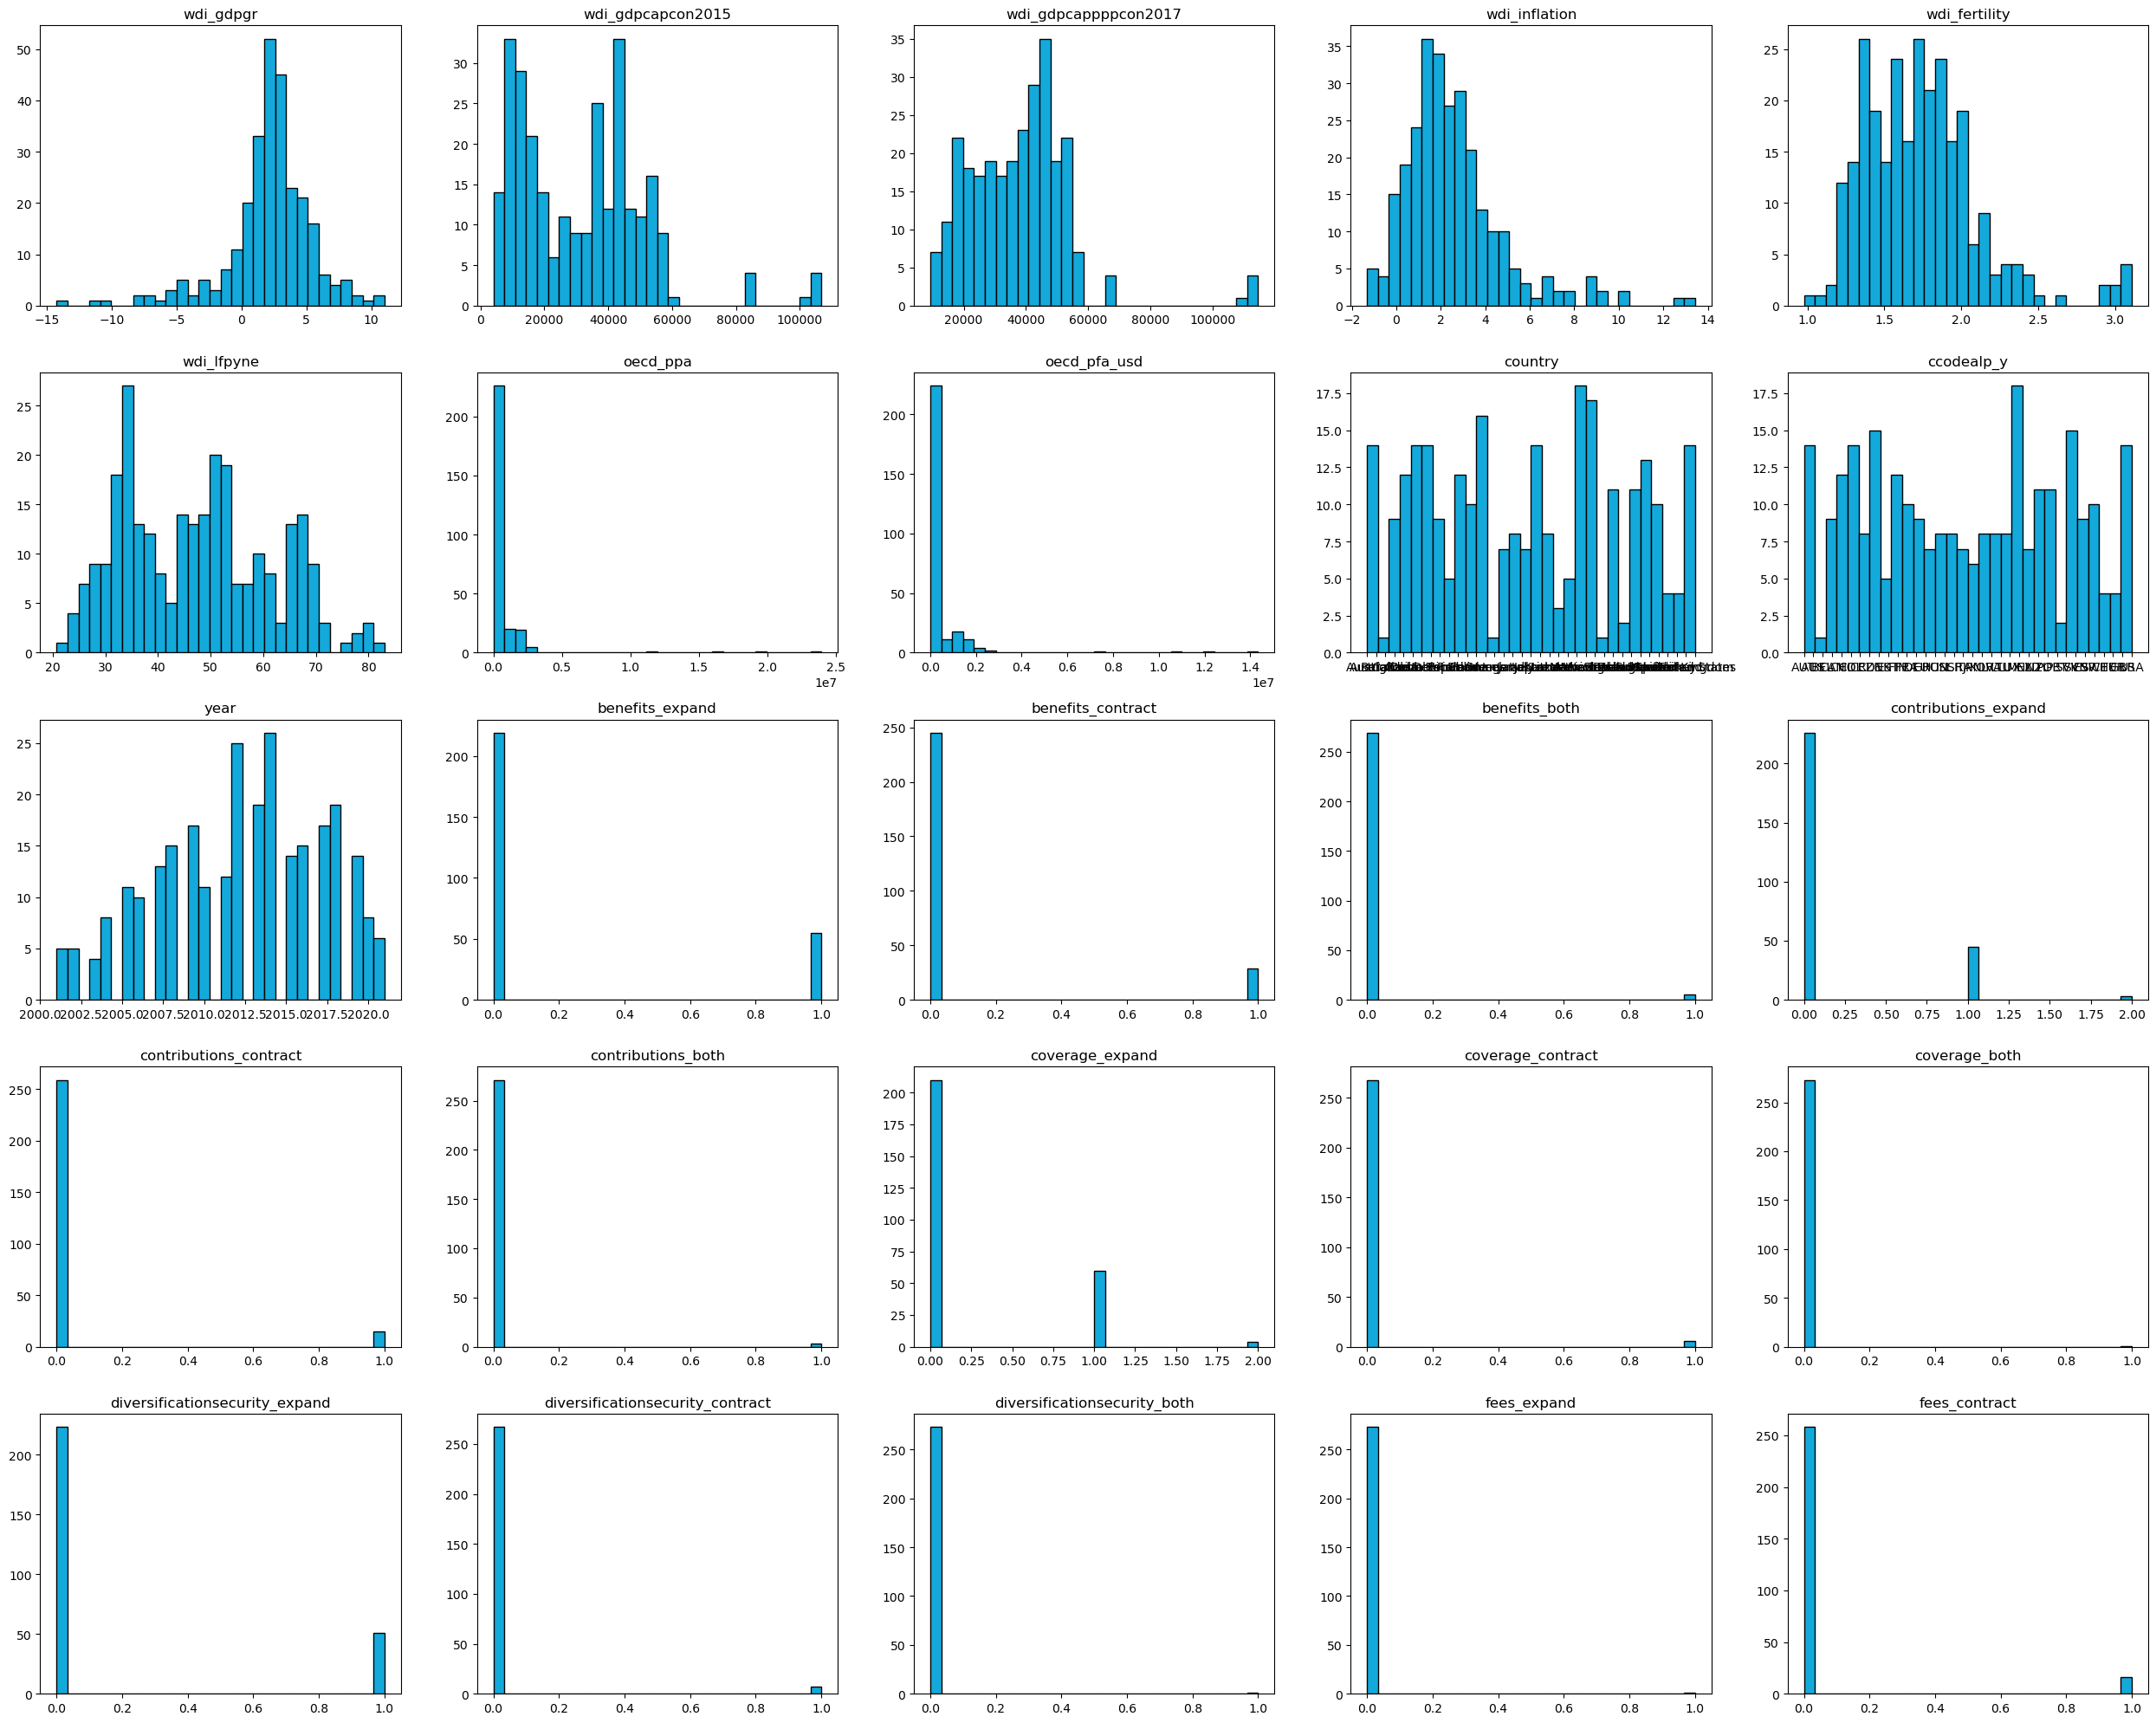

In [15]:
color = '#14a9db'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #14a9db;">Checking the target distribution</h3>

In [16]:
round(df['oecd_pfa_pc_gdp'].describe().T, 2)

count    274.00
mean      33.44
std       40.55
min        0.00
25%        5.77
50%       12.44
75%       55.23
max      194.19
Name: oecd_pfa_pc_gdp, dtype: float64

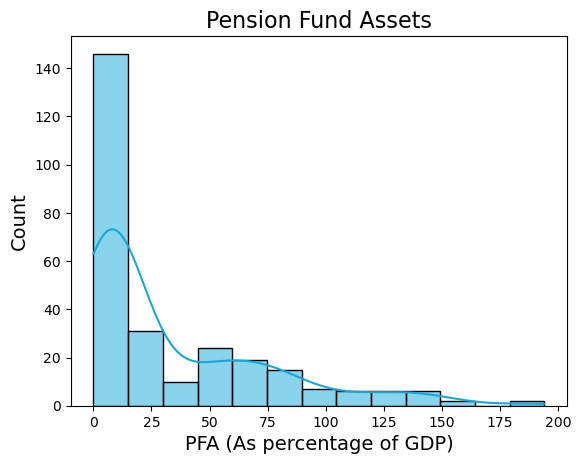

In [17]:
color = '#14a9db'

sns.histplot(df["oecd_pfa_pc_gdp"], color=color, kde=True)

plt.title('Pension Fund Assets', fontsize=16)
plt.xlabel('PFA (As percentage of GDP)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

<h3 style="color: #14a9db;">Checking outliers</h3>

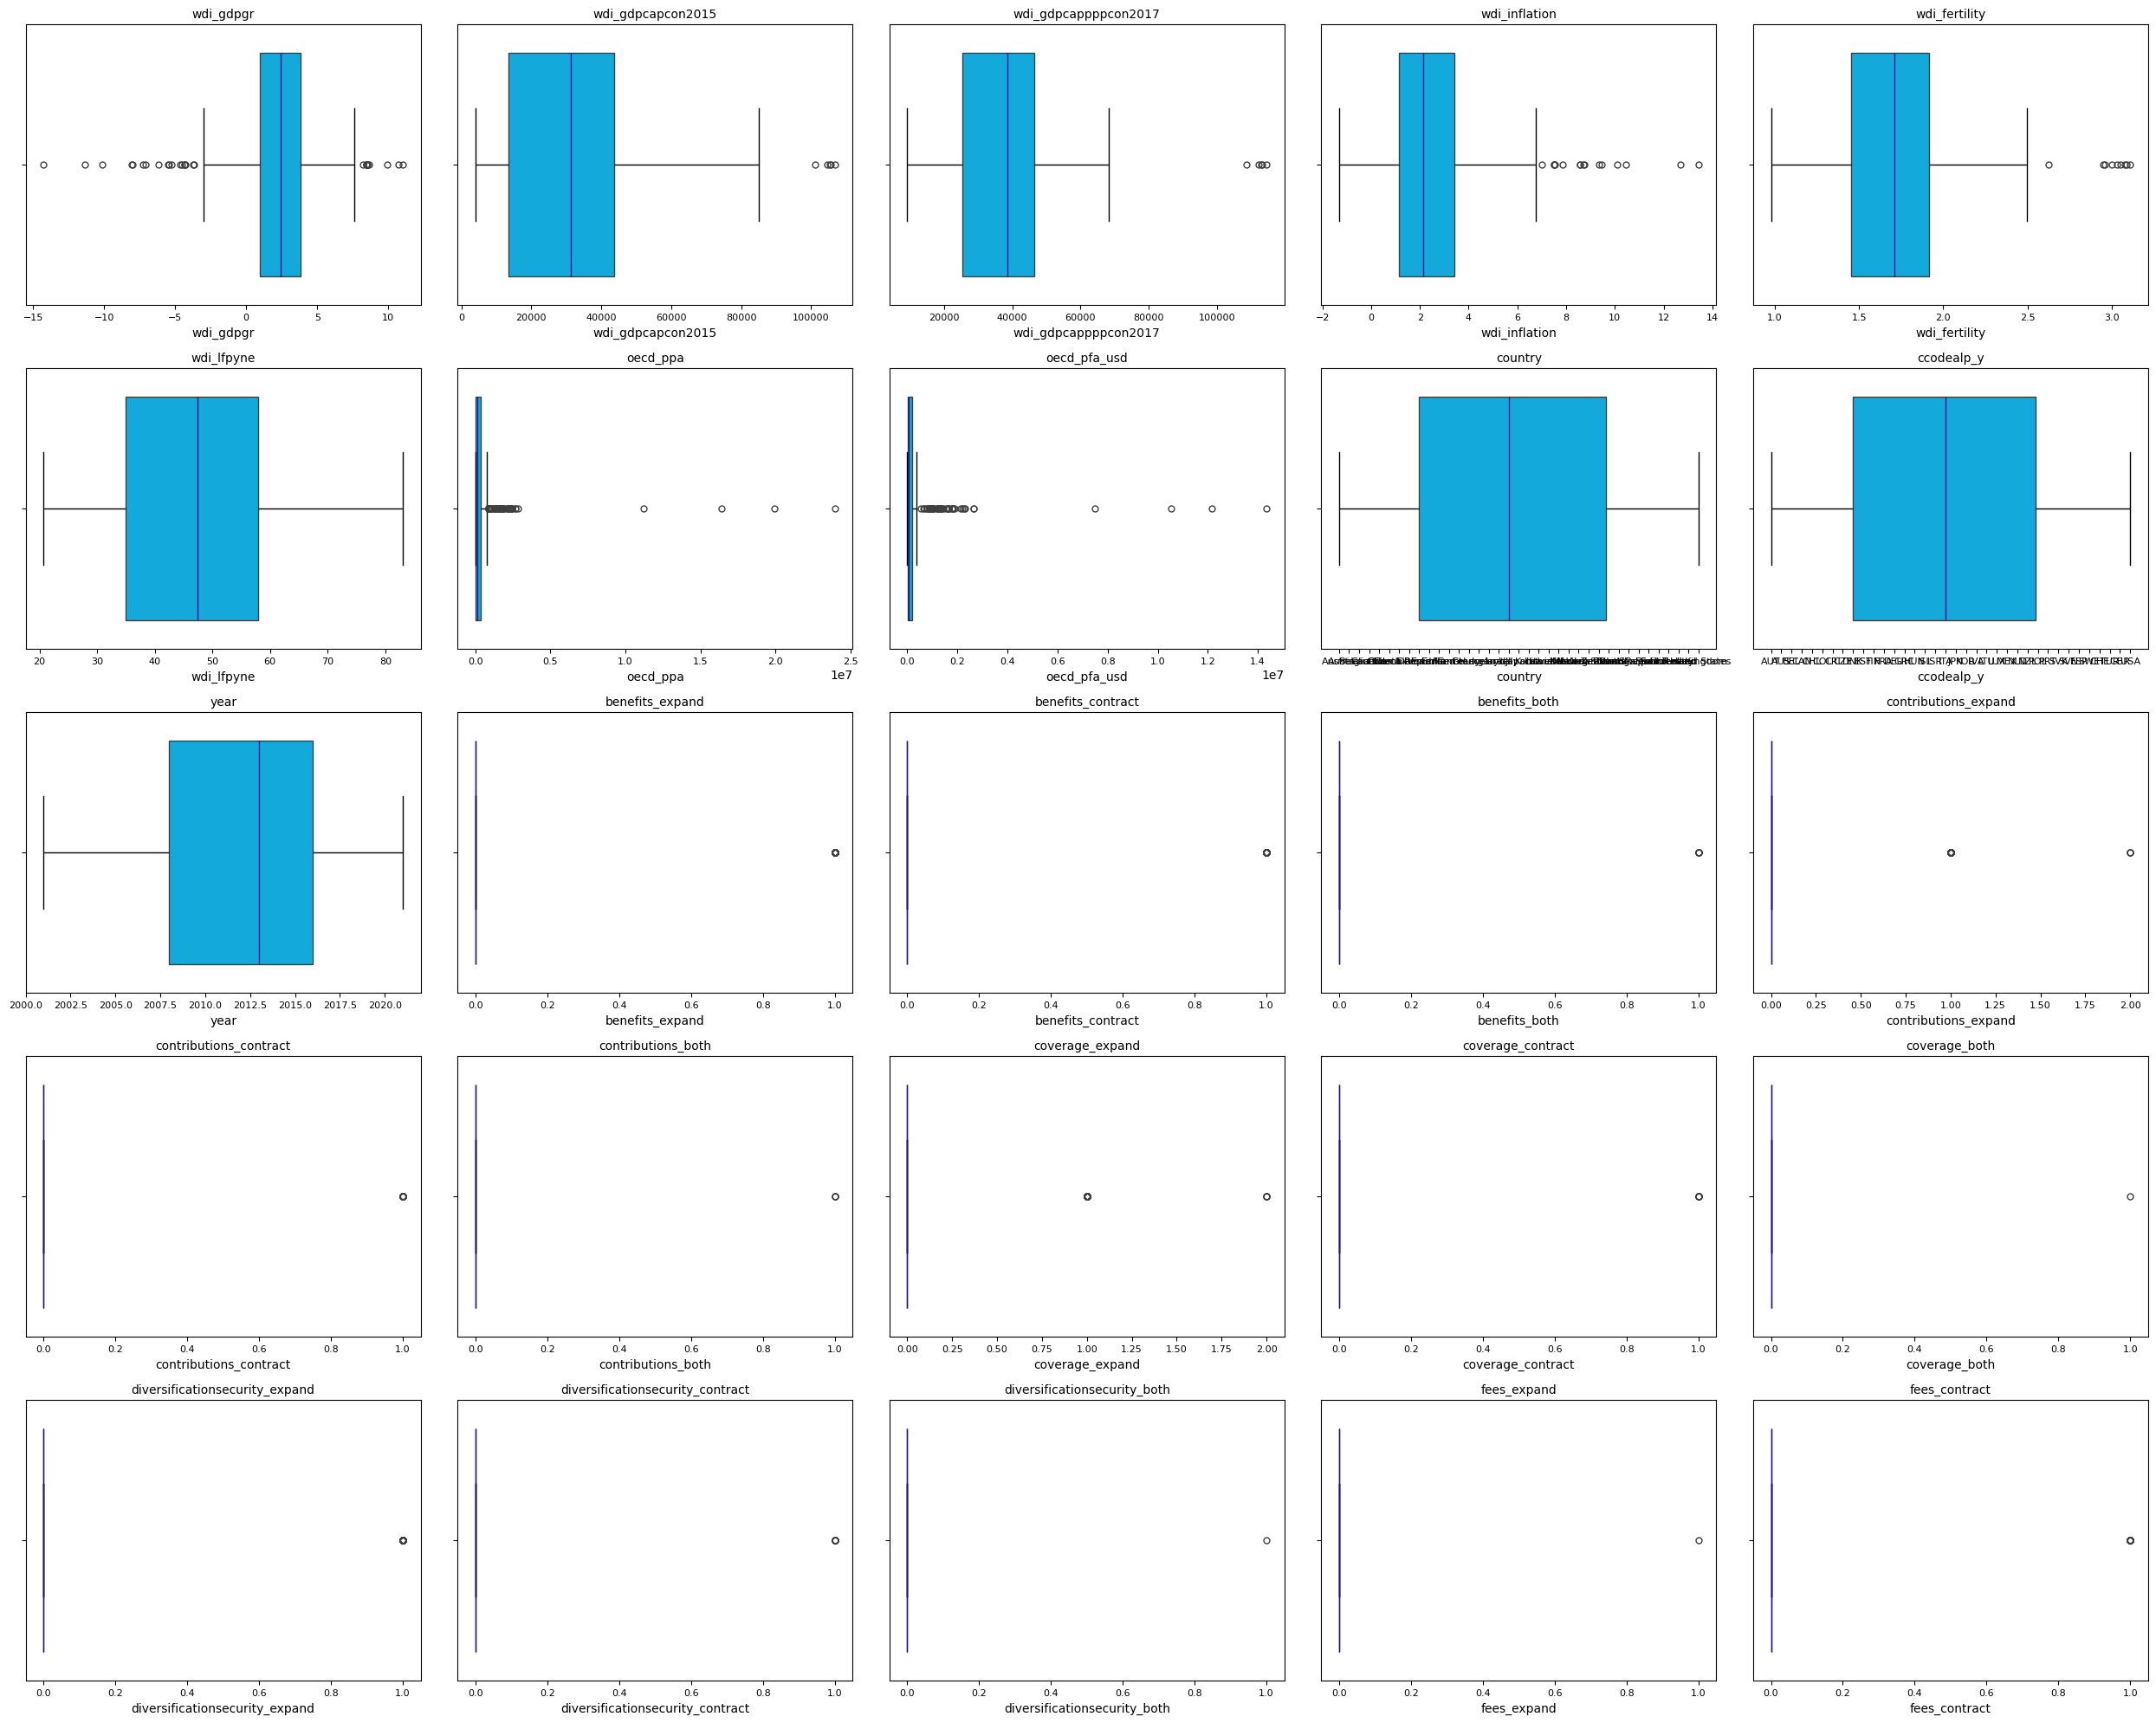

In [18]:
color  = '#14a9db'
color2 = '#210e9c'

# grid size
nrows, ncols = 5, 5 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    sns.boxplot(data=df, x=df.columns[i], ax=ax, vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color), 
               medianprops=dict(color=color2), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    

plt.tight_layout()
plt.show()

<h3 style="color: #14a9db;">Looking for correlations with Target</h3>

In [19]:
col_num = ['year','wdi_gdpgr', 'wdi_gdpcapcon2015', 'wdi_gdpcappppcon2017', 'wdi_inflation', 'wdi_fertility', 'reforms', 
            'oecd_ppa', 'oecd_pfa_usd', 'oecd_pfa_pc_gdp']
df_num = df[col_num]

In [20]:
df_num.corrwith(df_num["oecd_pfa_pc_gdp"]).sort_values(ascending=False)

oecd_pfa_pc_gdp         1.000000
wdi_gdpcapcon2015       0.462448
oecd_pfa_usd            0.358885
wdi_gdpcappppcon2017    0.324310
oecd_ppa                0.285098
wdi_fertility           0.155465
year                    0.140678
reforms                 0.093531
wdi_gdpgr               0.002792
wdi_inflation          -0.103258
dtype: float64

<h3 style="color: #14a9db;">Showing multicollinearity</h3>

In [21]:
num_corr = round(df_num.corr(), 2)

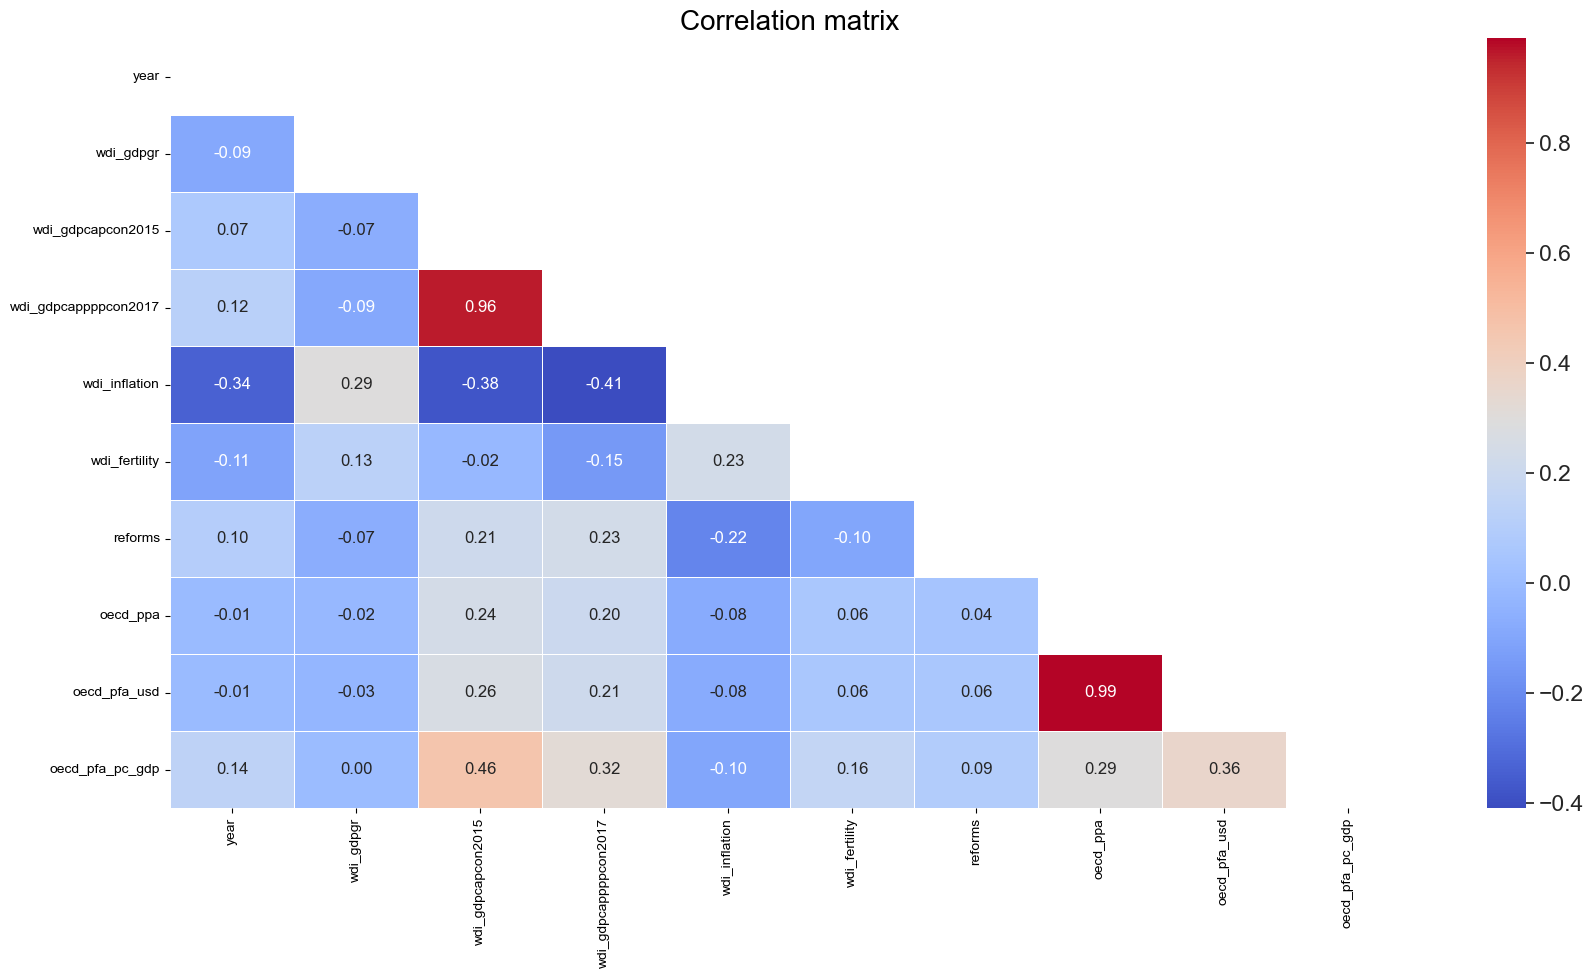

In [22]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation matrix", fontsize=20) # add title
plt.show()

<h2 style="color: #1460db;">04 | Data Preparation</h2>

In [23]:
col_num2 = ['year','wdi_gdpgr', 'wdi_gdpcapcon2015', 'wdi_inflation', 'wdi_fertility', 'reforms', 
            'oecd_pfa_pc_gdp']
df_num2 = df[col_num2]

<h3 style="color: #14a9db;">X-y Split</h3>

In [24]:
X = df_num2.drop("oecd_pfa_pc_gdp", axis=1)
y = df_num2["oecd_pfa_pc_gdp"]

<h2 style="color: #1460db;">05 | Modeling</h2>

<h3 style="color: #14a9db;">Train-test Split</h3>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 274.
70% for training data: 191.
30% for test data: 83.


<h3 style="color: #14a9db;">Selecting the model: Linear regression</h3>

<h3 style="color: #14a9db;">Linear regression</h3>

In [27]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

<h3 style="color: #14a9db;">Model validation</h3>

In [28]:
# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

array([21.39002362, 80.8898374 , 26.42085874, 52.66568401, 45.1861097 ,
       27.80132603, 25.92611469, 41.56773089, 75.37905218, 19.8636527 ,
       40.95615091, 15.94014657, 12.1061662 , 44.14207208,  9.07012045,
       26.29838111, 41.82399114, 15.93291062, 43.42403424, 19.32313424,
       17.47831798, 17.15306354, 25.23918292, 19.33648049, 32.97742308,
        7.88572594, 21.72091884, 13.71565751, 58.9947544 , 16.44751559,
       42.61764064, 50.86492349,  7.66920157, 53.30113569, 57.50360667,
       16.73593386, 18.71637064, 25.73413021, 54.95193422, 48.69006612,
       19.81119787, 41.72850404, 47.23760311, 13.16521764, 11.34550501,
       46.88239636, 38.89582875, 48.80845327, 19.52734693, 40.44341075,
       41.75973645, 22.02115046, 21.98916286, 30.04541081, 24.02853471,
       59.16393979, 20.74306658, 53.79758845, 18.93083563, 24.20442783,
        7.39764934, 39.57726464, 15.03535943, 24.87470061, 34.46776886,
       53.28880393, 19.19281483, 49.81356421,  2.78550946, 17.87

In [29]:
# Make a dataframe to compare

eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
ccodealp_year,,
CHL14,67.914,21.390024
LUX05,1.058,80.889837
NZL01,15.277,26.420859
ISR09,42.668,52.665684
GBR14,79.134,45.186110
...,...,...
FIN10,78.693,41.865051
GRC12,0.046,13.780213
CRI14,11.262,19.542270


In [30]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
ccodealp_year,,,
CHL14,67.914,21.390024,46.523976
LUX05,1.058,80.889837,79.831837
NZL01,15.277,26.420859,11.143859
ISR09,42.668,52.665684,9.997684
GBR14,79.134,45.186110,33.947890


<h3 style="color: #14a9db;">Model metrics</h3>

In [31]:
r2_1 = r2_score(y_test, predictions)
RMSE_1 = mean_squared_error(y_test, predictions, squared=False)
MSE_1 = mean_squared_error(y_test, predictions)
MAE_1 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_1, 4))
print("RMSE = ", round(RMSE_1, 4))
print("MSE =  ", round(MSE_1, 4)) 
print("MAE = ", round(MAE_1, 4))

R2 =  0.3203
RMSE =  34.8969
MSE =   1217.7914
MAE =  25.0825


<h2 style="color: #1460db;">06 | Improving the Model</h2>

<h3 style="color: #14a9db;">Ridge regression</h3>

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

<h4 style="color: #14a9db;">Model validation</h4>

In [34]:
predictions_ridge = ridge.predict(X_test)

<h4 style="color: #14a9db;">Model metrics</h4>

In [35]:
r2_2 = r2_score(y_test, predictions_ridge)
RMSE_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_2 = mean_squared_error(y_test, predictions_ridge)
MAE_2 = mean_absolute_error(y_test, predictions_ridge)

#Printing the results
print("R2 = ", round(r2_2, 4))
print("RMSE = ", round(RMSE_2, 4))
print("The value of the metric MSE is ", round(MSE_2, 4))
print("MAE = ", round(MAE_2, 4))


R2 =  0.3205
RMSE =  34.8907
The value of the metric MSE is  1217.3624
MAE =  25.0849


<h3 style="color: #14a9db;">Lasso regression</h3>

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

<h4 style="color: #14a9db;">Model validation</h4>

In [38]:
predictions_lasso = lasso.predict(X_test)

<h4 style="color: #14a9db;">Model metrics</h4>

In [39]:
r2_3 = r2_score(y_test, predictions_lasso)
RMSE_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3 = mean_absolute_error(y_test, predictions_lasso)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.3141
RMSE =  35.0556
The value of the metric MSE is  1228.8934
MAE =  25.2078


<h3 style="color: #14a9db;">Decision tree regression</h3>

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

<h4 style="color: #14a9db;">Model validation</h4>

In [42]:
predictions_tree = tree.predict(X_test)

In [87]:
# Make a dataframe to compare
eval_tree = pd.DataFrame({"actual":y_test,"pred":predictions_tree})
eval_tree

eval_tree["dif"] = abs(eval_tree["actual"]-eval_tree["pred"])
eval_tree.head()

,actual,pred,dif
ccodealp_year,,,
CHL14,67.91,59.66,8.25
LUX05,1.06,1.94,0.88
NZL01,15.28,0.15,15.12
ISR09,42.67,49.31,6.64
GBR14,79.13,80.05,0.92


<h4 style="color: #14a9db;">Model metrics</h4>

In [43]:
r2_4 = r2_score(y_test, predictions_tree)
RMSE_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_4 = mean_squared_error(y_test, predictions_tree)
MAE_4 = mean_absolute_error(y_test, predictions_tree)

#Printing the results
print("R2 = ", round(r2_4, 4))
print("RMSE = ", round(RMSE_4, 4))
print("The value of the metric MSE is ", round(MSE_4, 4))
print("MAE = ", round(MAE_4, 4))

R2 =  0.567
RMSE =  27.8514
The value of the metric MSE is  775.7
MAE =  15.9263


<h4 style="color: #14a9db;"> The decision tree</h4>

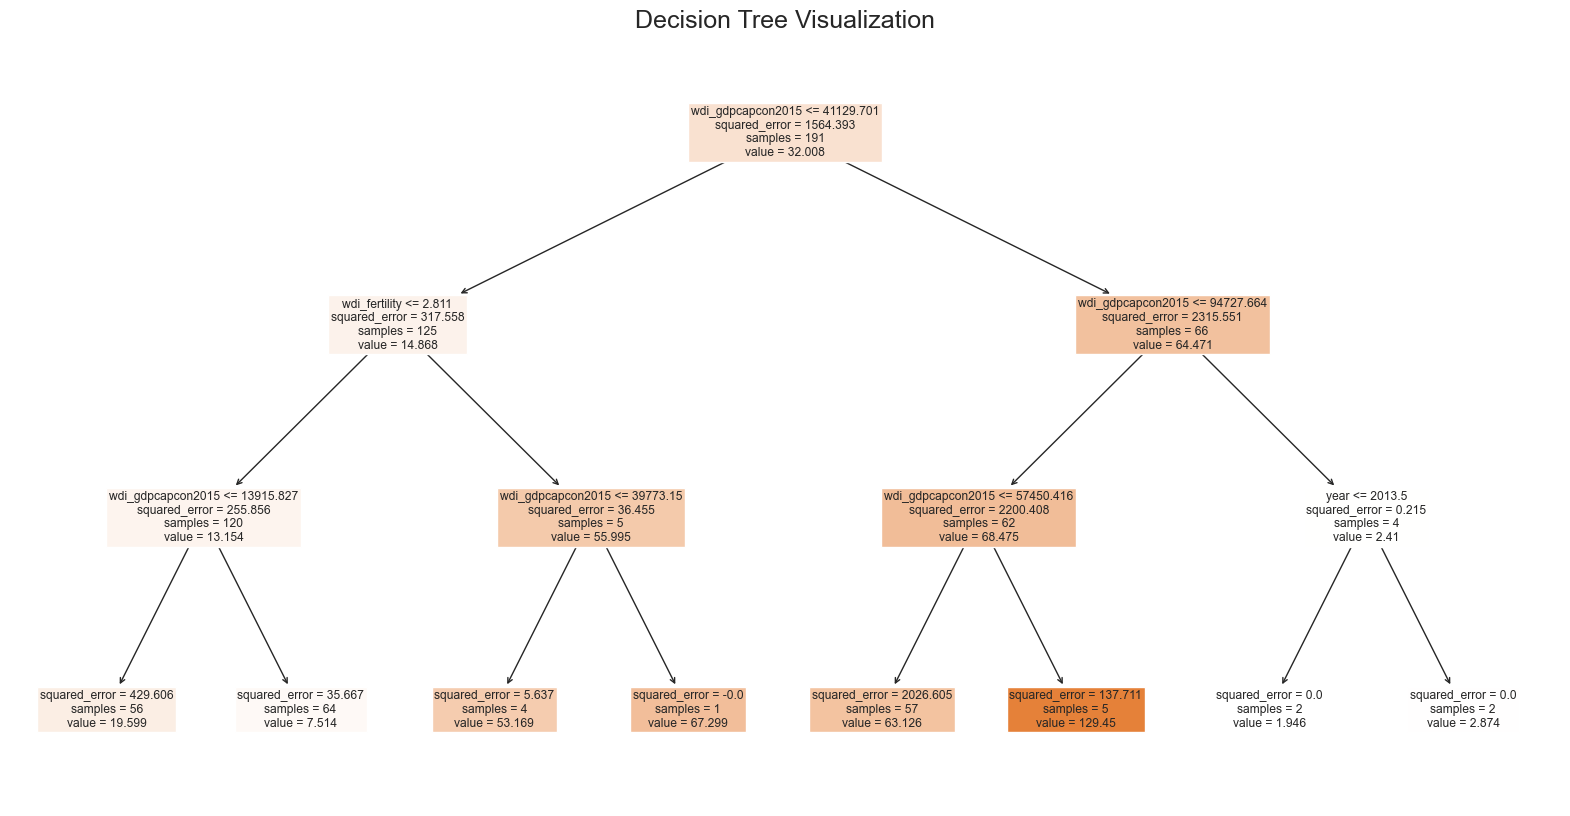

In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd

# Assuming X_train and y_train are your training data and targets
# Fit the decision tree model
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10)) # Adjust the size as needed
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [85]:
from sklearn.tree import export_text
tree_text = export_text(tree, feature_names=list(X_train.columns))
print(tree_text)

|--- wdi_gdpcapcon2015 <= 41129.70
|   |--- wdi_fertility <= 2.81
|   |   |--- wdi_gdpcapcon2015 <= 13915.83
|   |   |   |--- wdi_gdpcapcon2015 <= 11472.85
|   |   |   |   |--- year <= 2011.50
|   |   |   |   |   |--- wdi_gdpcapcon2015 <= 10472.83
|   |   |   |   |   |   |--- wdi_inflation <= 8.20
|   |   |   |   |   |   |   |--- year <= 2004.50
|   |   |   |   |   |   |   |   |--- wdi_fertility <= 2.54
|   |   |   |   |   |   |   |   |   |--- year <= 2003.00
|   |   |   |   |   |   |   |   |   |   |--- value: [6.73]
|   |   |   |   |   |   |   |   |   |--- year >  2003.00
|   |   |   |   |   |   |   |   |   |   |--- value: [6.71]
|   |   |   |   |   |   |   |   |--- wdi_fertility >  2.54
|   |   |   |   |   |   |   |   |   |--- value: [4.36]
|   |   |   |   |   |   |   |--- year >  2004.50
|   |   |   |   |   |   |   |   |--- wdi_gdpcapcon2015 <= 6859.96
|   |   |   |   |   |   |   |   |   |--- year <= 2006.00
|   |   |   |   |   |   |   |   |   |   |--- value: [11.50]
|   |   |   |  

<h3 style="color: #14a9db;">KNN regression</h3>

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

<h4 style="color: #14a9db;">Model validation</h4>

In [46]:
predictions_knn = knn.predict(X_test)

In [47]:
# Make a dataframe to compare
eval_df2 = pd.DataFrame({"actual":y_test,"pred":predictions_knn})
eval_df2

eval_df2["dif"] = abs(eval_df2["actual"]-eval_df2["pred"])
eval_df2.head()

,actual,pred,dif
ccodealp_year,,,
CHL14,67.914,30.7350,37.1790
LUX05,1.058,28.0522,26.9942
NZL01,15.277,7.7546,7.5224
ISR09,42.668,7.7546,34.9134
GBR14,79.134,70.3812,8.7528


<h4 style="color: #14a9db;">Model metrics</h4>

In [48]:
r2_5 = r2_score(y_test, predictions_knn)
RMSE_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_5 = mean_squared_error(y_test, predictions_knn)
MAE_5 = mean_absolute_error(y_test, predictions_knn)

#Printing the results
print("R2 = ", round(r2_5, 4))
print("RMSE = ", round(RMSE_5, 4))
print("The value of the metric MSE is ", round(MSE_5, 4))
print("MAE = ", round(MAE_5, 4))

R2 =  0.4489
RMSE =  31.4214
The value of the metric MSE is  987.3064
MAE =  18.3721


<h3 style="color: #14a9db;">XGBoost regression</h3>

In [49]:
import xgboost as xgb

In [50]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h4 style="color: #14a9db;">Model validation</h4>

In [51]:
predictions_xgb = xgbr.predict(X_test)

<h4 style="color: #14a9db;">Model metrics</h4>

In [52]:
r2_6 = r2_score(y_test, predictions_xgb)
RMSE_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_6 = mean_squared_error(y_test, predictions_xgb)
MAE_6 = mean_absolute_error(y_test, predictions_xgb)

#Printing the results
print("R2 = ", round(r2_6, 4))
print("RMSE = ", round(RMSE_6, 4))
print("The value of the metric MSE is ", round(MSE_6, 4))
print("MAE = ", round(MAE_6, 4))

R2 =  0.5274
RMSE =  29.0984
The value of the metric MSE is  846.7163
MAE =  17.5212


<h3 style="color: #14a9db;">Model Comparison</h3>

In [53]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6],
    'RMSE': [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5, RMSE_6],
    'MSE': [MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6],
    'MAE': [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6]
}

In [54]:
df_metrics = pd.DataFrame(metrics)
round(df_metrics.set_index("Model"),4)

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.3203,34.8969,1217.7914,25.0825
Ridge,0.3205,34.8907,1217.3624,25.0849
Lasso,0.3141,35.0556,1228.8934,25.2078
Decision Tree,0.5670,27.8514,775.7000,15.9263
KNN,0.4489,31.4214,987.3064,18.3721
XGBoost,0.5274,29.0984,846.7163,17.5212


KNN stands for **K-Nearest Neighbors**. It's a type of supervised machine learning algorithm that can be used for both classification and regression tasks.

### Key Concepts of K-Nearest Neighbors:

1. **Instance-based Learning**: KNN is a type of instance-based learning, where the model makes predictions based directly on the instances in the training set.

2. **Distance Metric**: To make predictions, KNN calculates the distance between the new input data point and all the training data points. The most common distance measure used is Euclidean distance, but other metrics like Manhattan or Minkowski can also be used.

3. **Neighbors**: 
   - In classification, the algorithm identifies the 'k' (a user-defined parameter) nearest neighbors to the input data point and assigns the class label that is most common among those neighbors.
   - In regression, KNN predicts the value for the input data point based on the mean (or median) of the values of its 'k' nearest neighbors.

4. **Parameter 'k'**: 
   - The choice of 'k' can affect the performance of the model. A small 'k' can lead to a noisy model, while a large 'k' may smooth over the data too much.

### Advantages and Disadvantages:

- **Advantages**: 
  - Simple and easy to implement.
  - Non-parametric, meaning it makes no assumptions about the underlying data distribution.

- **Disadvantages**:
  - Computationally expensive as the dataset grows, since it involves calculating distances to many neighbors for each prediction.
  - Performance can be significantly affected by irrelevant or unscaled features.

KNN is a versatile algorithm ideal for smaller datasets that benefit from simplicity and easy interpretability. If you want to dive deeper into KNN or any other aspect, feel free to ask!

<h2 style="color: #1460db;">07 | Reporting</h2>

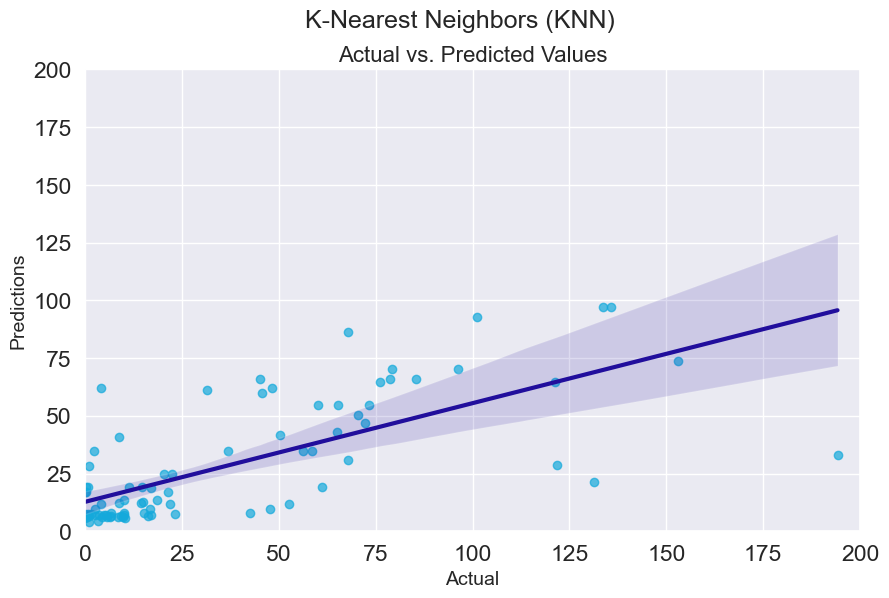

In [89]:
scatter_color = '#14a9db'
line_color = '#210e9c'

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df2,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

# Set the x and y axis limits to the same range
plt.xlim(0, 200)
plt.ylim(0, 200)

# Set ticks at intervals of 25
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 201, 25))

plt.suptitle('K-Nearest Neighbors (KNN)', fontsize=18)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)

plt.show()

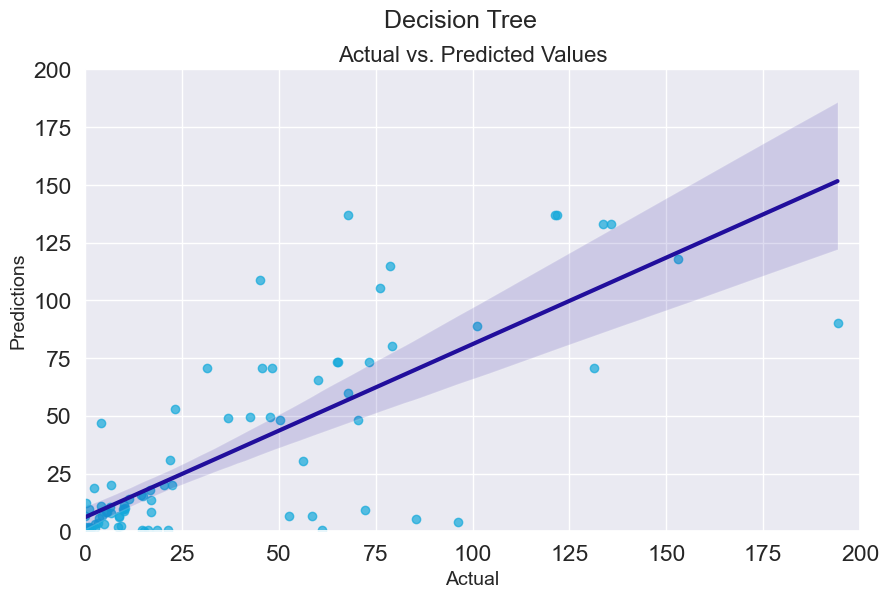

In [90]:
scatter_color = '#14a9db'
line_color = '#210e9c'

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_tree,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

# Set the x and y axis limits to the same range
plt.xlim(0, 200)
plt.ylim(0, 200)

# Set ticks at intervals of 25
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 201, 25))

plt.suptitle('Decision Tree', fontsize=18)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)

plt.show()

<h2 style="color: #1460db;">08 | Further improvements of XGBoost</h2>

<h3 style="color: #14a9db;">Normalization with MinMaxScaler</h3>

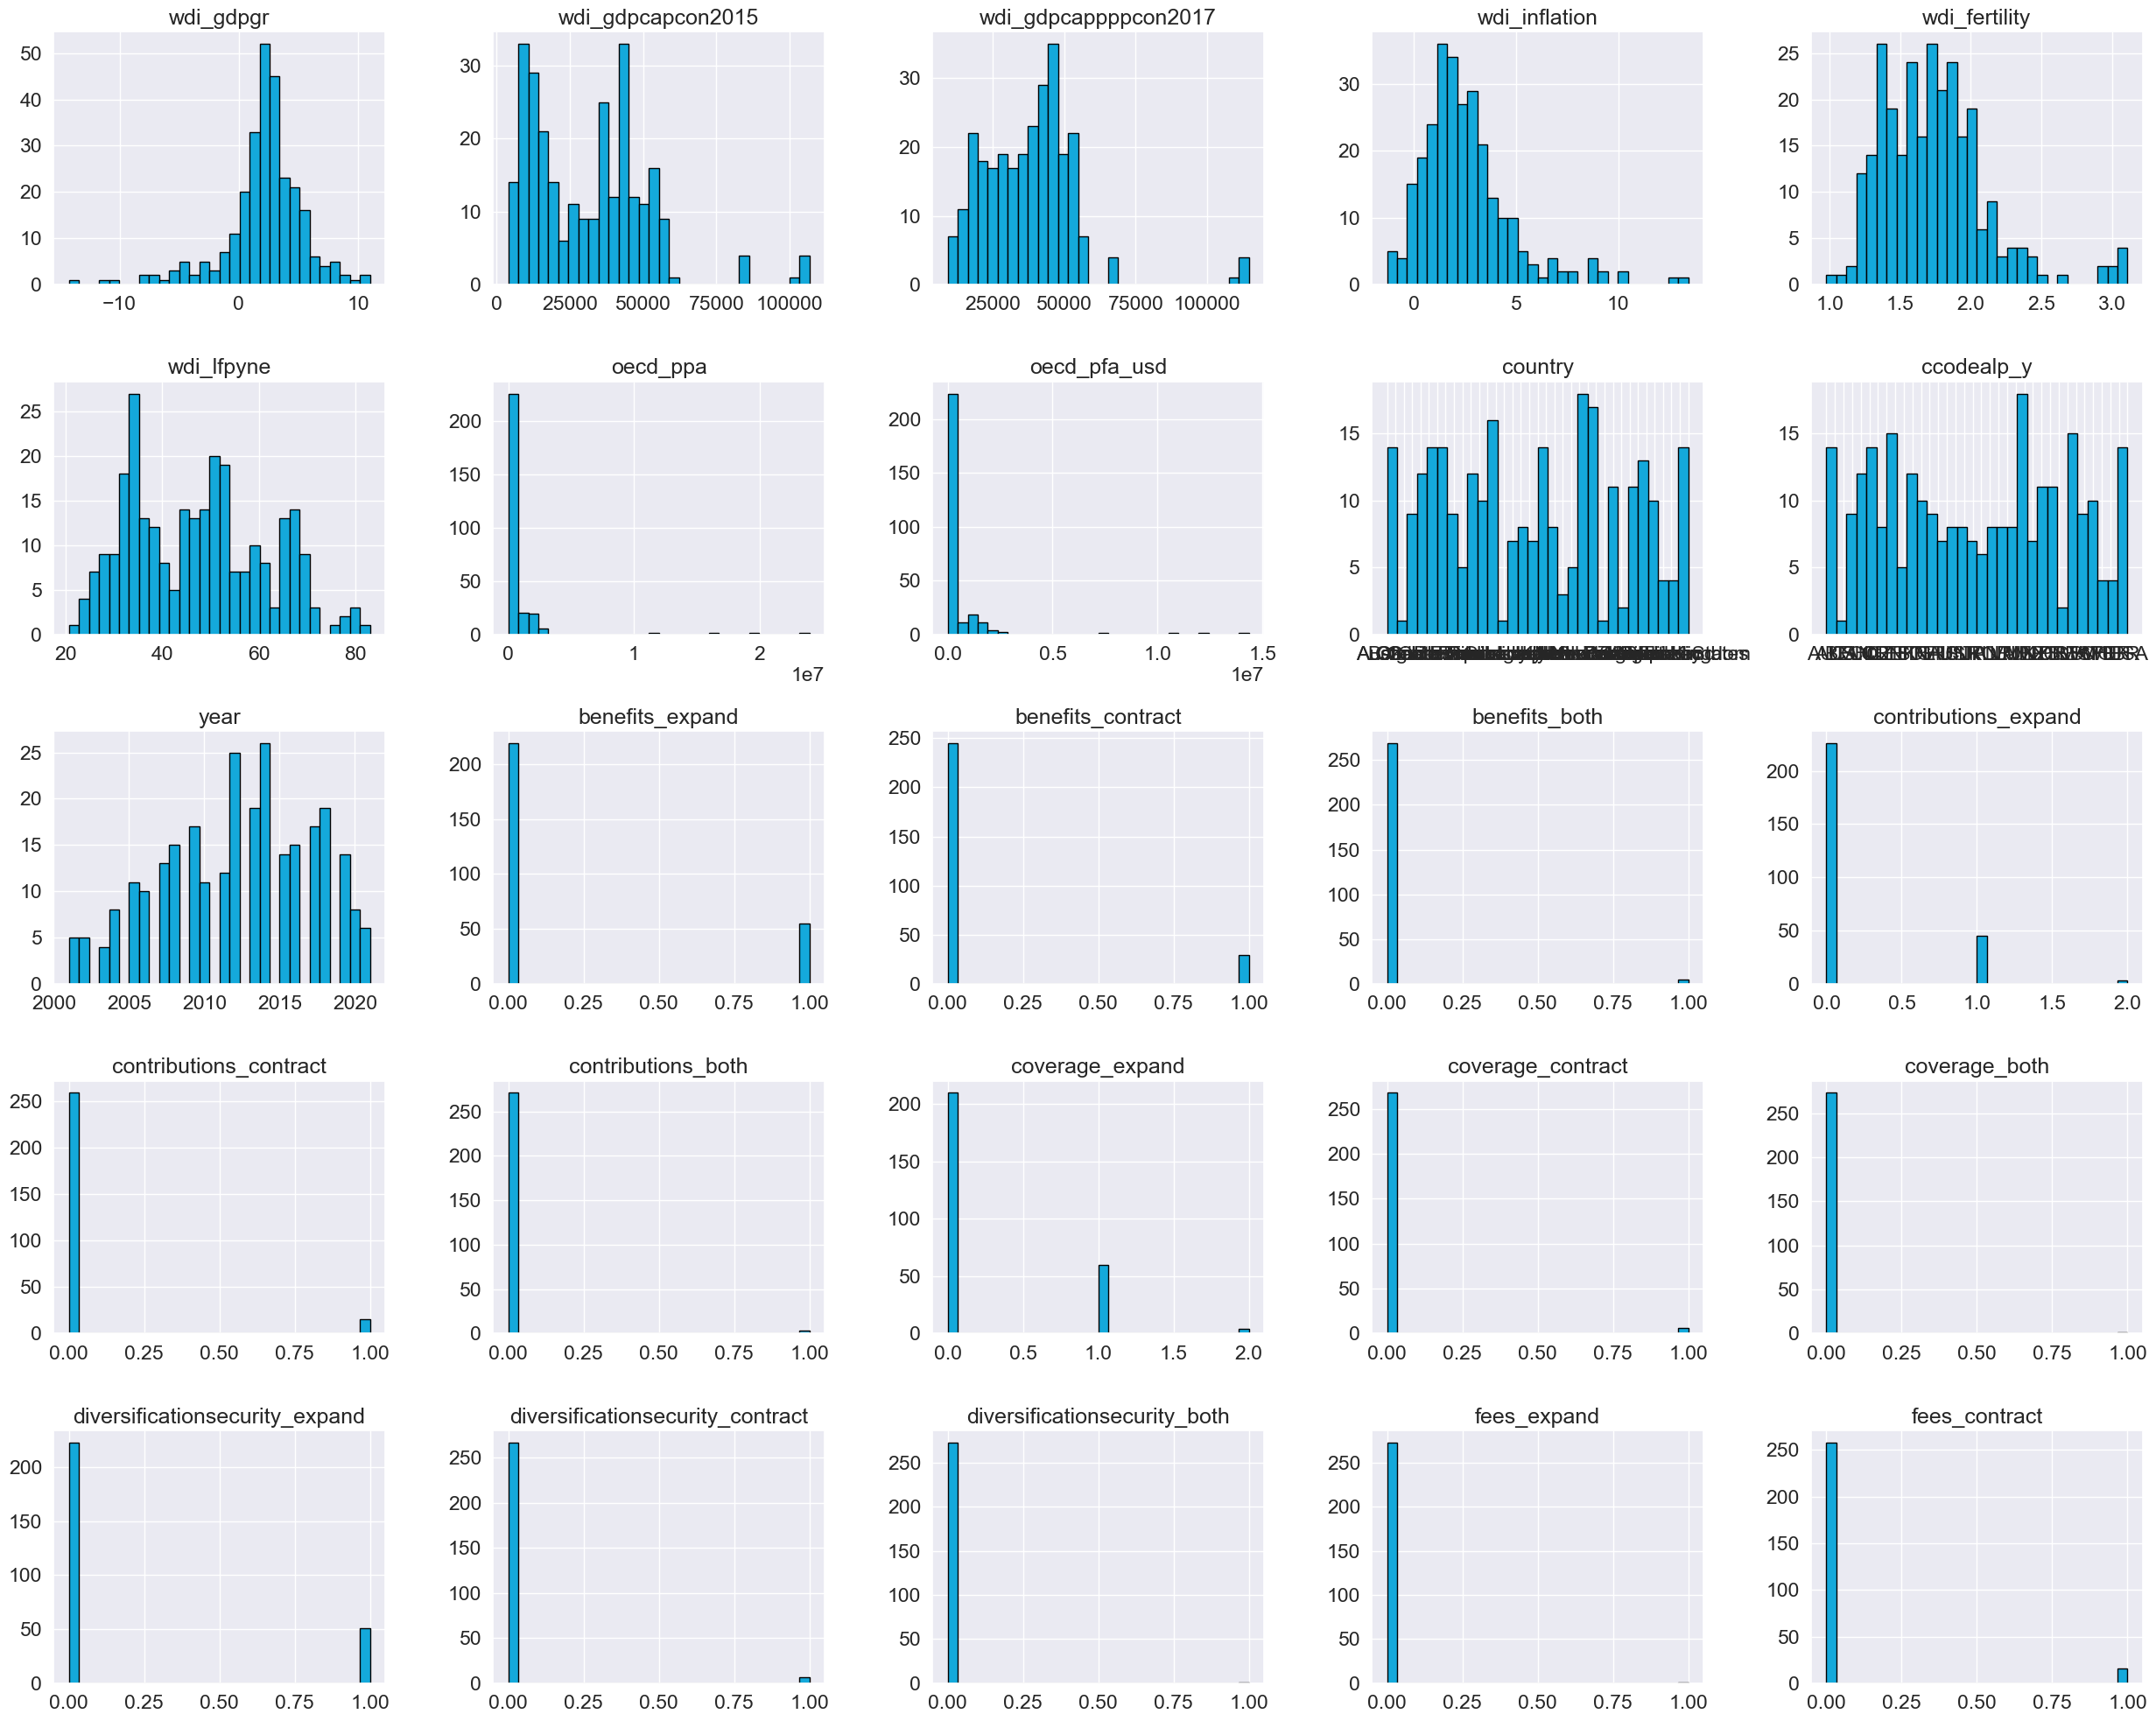

In [56]:
color  = '#14a9db'
color2 = '#210e9c'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler 

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

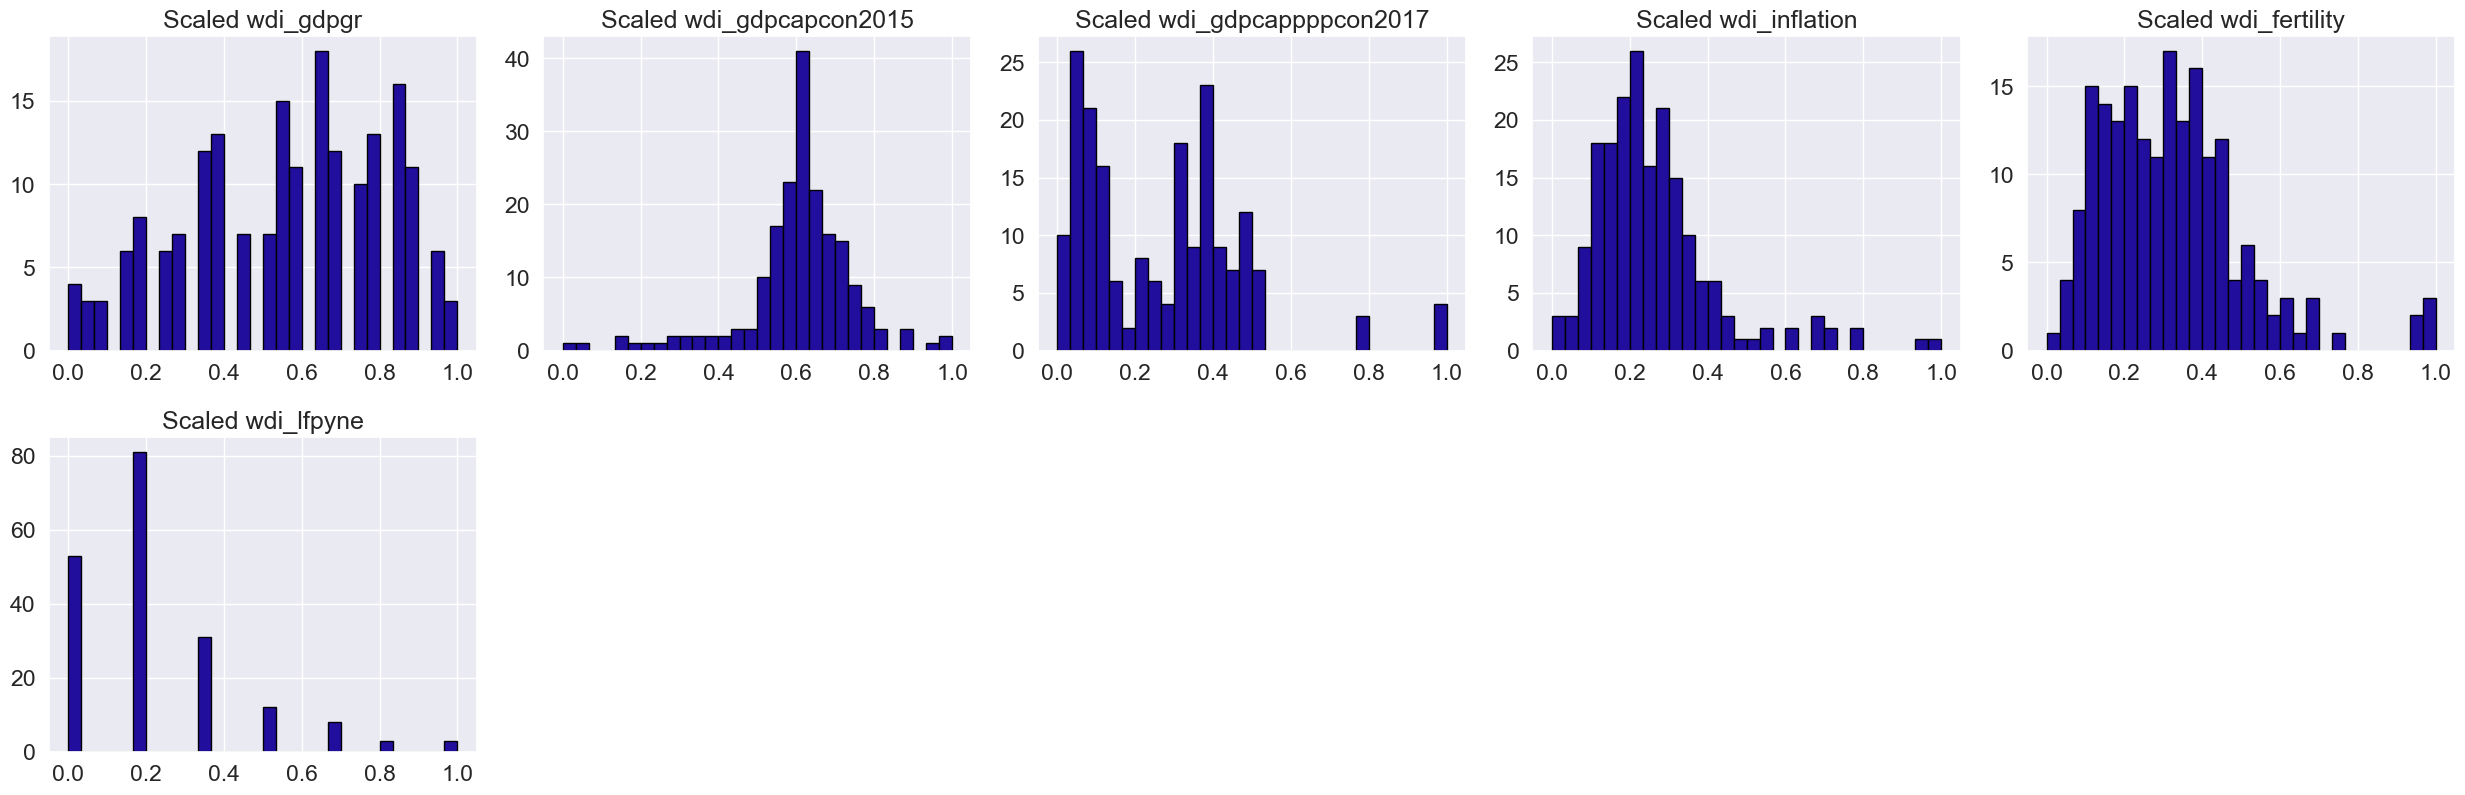

In [60]:
color2  = '#14a9db'
color = '#210e9c'

nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df.columns[i]}')

plt.tight_layout()
plt.show()

In [61]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_7 = xgbr.predict(X_test_scaled)

In [62]:
r2_7 = r2_score(y_test, predictions_xgb_7)
RMSE_7 = mean_squared_error(y_test, predictions_xgb_7, squared=False)
MSE_7 = mean_squared_error(y_test, predictions_xgb_7)
MAE_7 = mean_absolute_error(y_test, predictions_xgb_7)

#Printing the results
print("R2 = ", round(r2_7, 4))
print("RMSE = ", round(RMSE_7, 4))
print("The value of the metric MSE is ", round(MSE_7, 4))
print("MAE = ", round(MAE_7, 4))

R2 =  0.3493
RMSE =  34.142
The value of the metric MSE is  1165.6741
MAE =  19.738


<h3 style="color: #14a9db;">Standarization with StandardScaler</h3>

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_8 = xgbr.predict(X_test_scaled)

In [66]:
r2_8 = r2_score(y_test, predictions_xgb_8)
RMSE_8 = mean_squared_error(y_test, predictions_xgb_8, squared=False)
MSE_8 = mean_squared_error(y_test, predictions_xgb_8)
MAE_8 = mean_absolute_error(y_test, predictions_xgb_8)

#Printing the results
print("R2 = ", round(r2_8, 4))
print("RMSE = ", round(RMSE_8, 4))
print("The value of the metric MSE is ", round(MSE_8, 4))
print("MAE = ", round(MAE_8, 4))

R2 =  0.3493
RMSE =  34.142
The value of the metric MSE is  1165.6741
MAE =  19.738


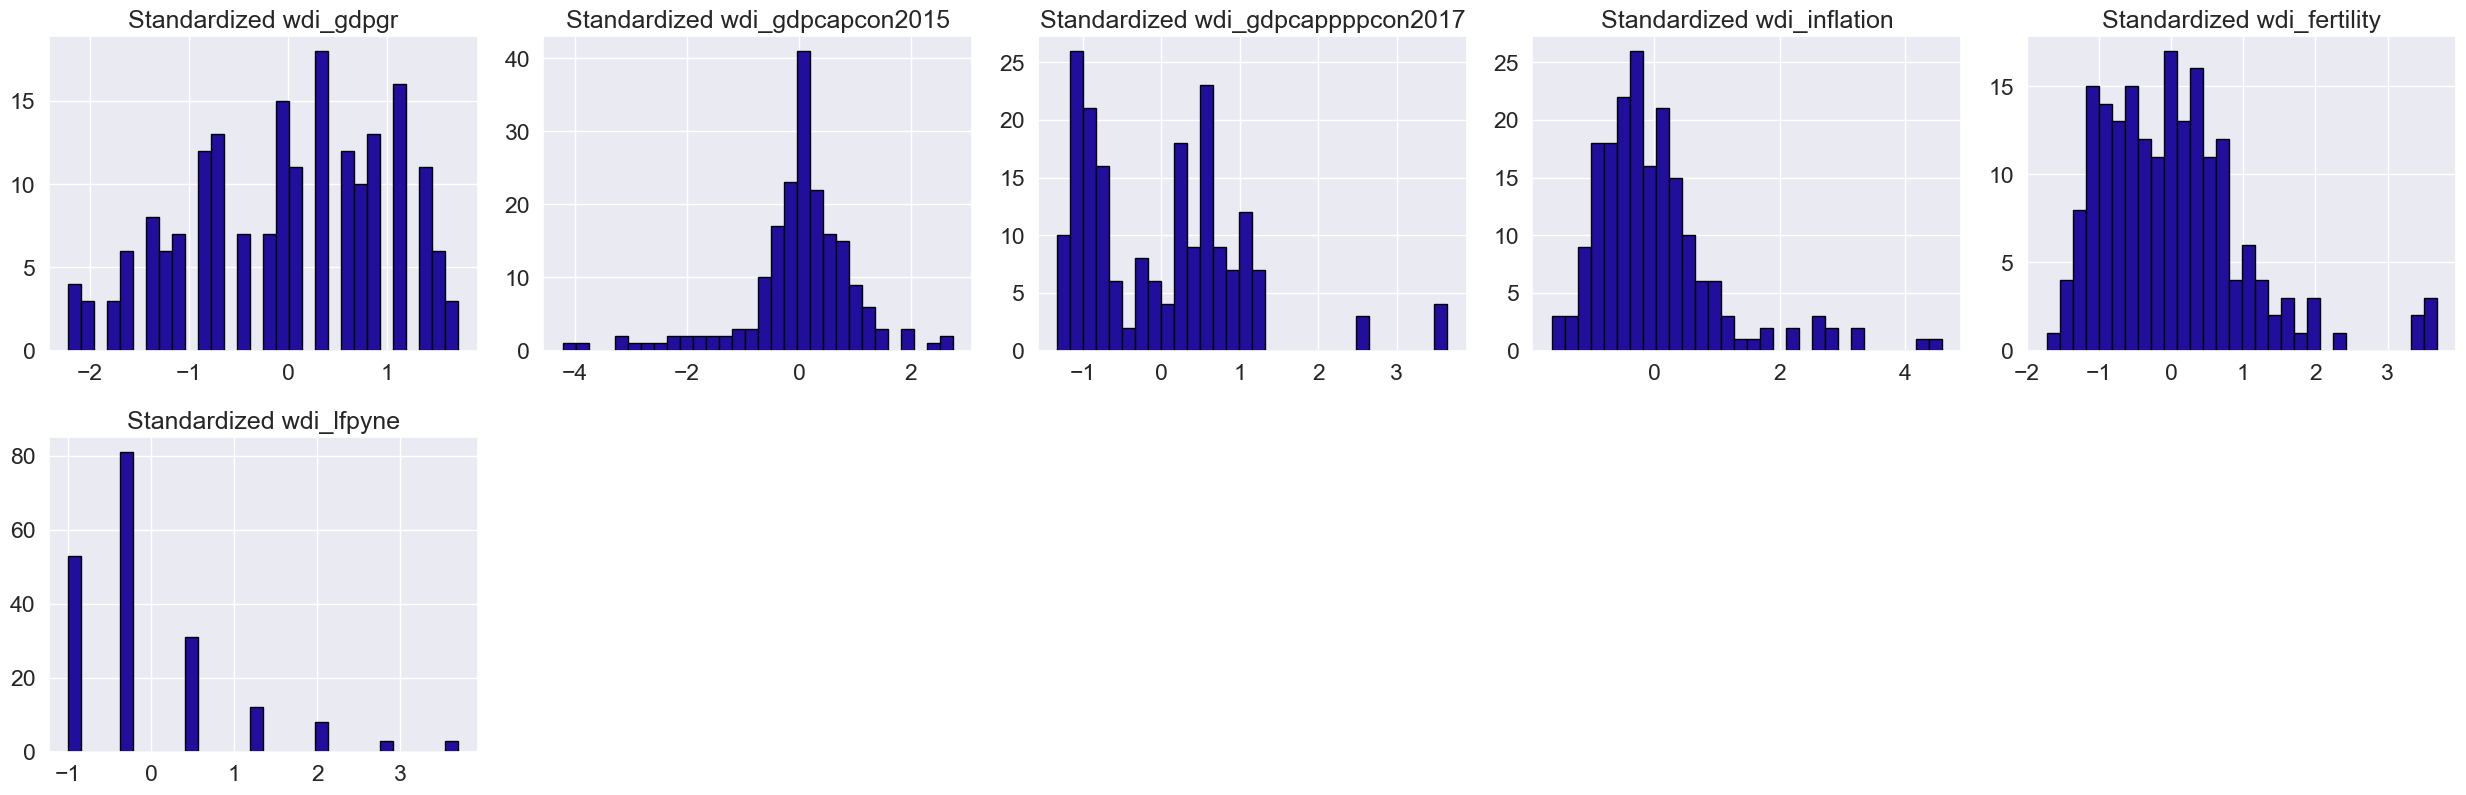

In [67]:
color = '#210e9c'

nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Standardized {df.columns[i]}')

plt.tight_layout()
plt.show()

<h3 style="color: #14a9db;">Normalization with log transform</h3>

In [68]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [69]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_9 = xgbr.predict(X_test_log)

In [70]:
r2_9 = r2_score(y_test, predictions_xgb_9)
RMSE_9 = mean_squared_error(y_test, predictions_xgb_9, squared=False)
MSE_9 = mean_squared_error(y_test, predictions_xgb_9)
MAE_9 = mean_absolute_error(y_test, predictions_xgb_9)

#Printing the results
print("R2 = ", round(r2_9, 4))
print("RMSE = ", round(RMSE_9, 4))
print("The value of the metric MSE is ", round(MSE_9, 4))
print("MAE = ", round(MAE_9, 4))

R2 =  0.392
RMSE =  33.0026
The value of the metric MSE is  1089.1727
MAE =  19.7003


<h3 style="color: #14a9db;">Model Comparison</h3>

In [71]:
metrics2 = {
    'Model': ['Without transformation', 'Scaled', 'Standarized', 'Normalized'],
    'R²': [r2_6, r2_7, r2_8, r2_9],
    'RMSE': [RMSE_6, RMSE_7, RMSE_8, RMSE_9],
    'MSE': [MSE_6, MSE_7, MSE_8, MSE_9],
    'MAE': [MAE_6, MAE_7, MAE_8, MAE_9]
}

In [72]:
df_metrics2 = pd.DataFrame(metrics2)
round(df_metrics2.set_index("Model"),4)

,R²,RMSE,MSE,MAE
Model,,,,
Without transformation,0.5274,29.0984,846.7163,17.5212
Scaled,0.3493,34.1420,1165.6741,19.7380
Standarized,0.3493,34.1420,1165.6741,19.7380
Normalized,0.3920,33.0026,1089.1727,19.7003


<h2 style="color: #1460db;">09 | Permutation Feature Importance (KNN Model)</h2>

KNN is a non-parametric model that makes predictions based on distances rather than learning explicit weights or coefficients for features, unlike decision trees or linear models.

One common approach is to use **permutation feature importance**, which involves reshuffling the values of each feature and checking how the change affects the model's predictions.

In [74]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calculate the permutation feature importance
result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42, n_jobs=2)

# Extract and print importance values
importances = result.importances_mean
feature_names = list(X_train.columns)
feature_importances = dict(zip(feature_names, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: np.abs(x[1]), reverse=True)

print("Permutation feature importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Permutation feature importance:
wdi_gdpcapcon2015: 0.8686
year: 0.0000
wdi_gdpgr: 0.0000
wdi_inflation: 0.0000
wdi_fertility: 0.0000
reforms: 0.0000


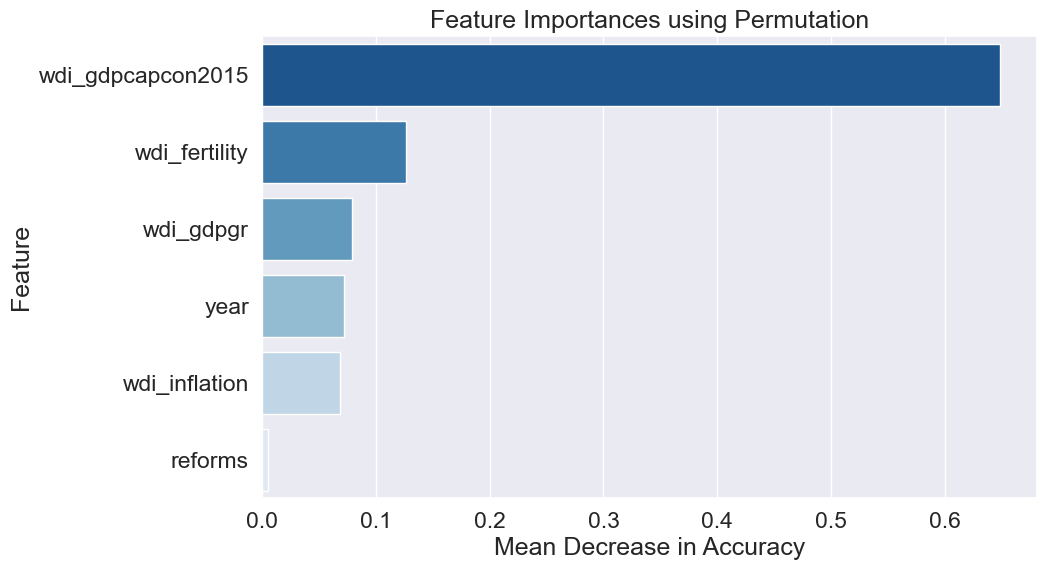

In [82]:
# Create a DataFrame for plotting
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Blues_r')
plt.title('Feature Importances using Permutation')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.show()

In [76]:
df_num2.corr()["oecd_pfa_pc_gdp"].sort_values(ascending=False)

oecd_pfa_pc_gdp      1.000000
wdi_gdpcapcon2015    0.462448
wdi_fertility        0.155465
year                 0.140678
reforms              0.093531
wdi_gdpgr            0.002792
wdi_inflation       -0.103258
Name: oecd_pfa_pc_gdp, dtype: float64

<h2 style="color: #1460db;">11 | Feature importance (Decision Tree model)</h2>

In [79]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

# Instantiate and fit the Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Get feature importances
importances = tree_model.feature_importances_

# Create a DataFrame to display the importances
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)

             Feature  Importance
2  wdi_gdpcapcon2015        0.65
4      wdi_fertility        0.13
1          wdi_gdpgr        0.08
0               year        0.07
3      wdi_inflation        0.07
5            reforms        0.01


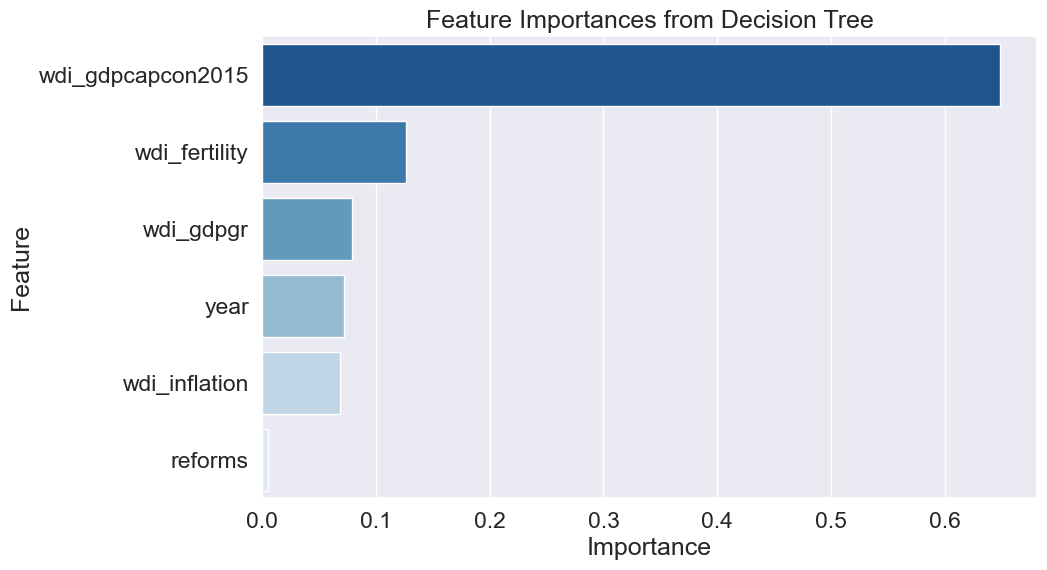

In [83]:
# Create a DataFrame for easier plotting
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Blues_r')
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<h2 style="color: #1460db;">12 | Lazy Predict</h2>

In [77]:
from lazypredict.Supervised import LazyRegressor

In [78]:
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None) 

models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

print(models.head(10))  # BEST 10 MODELS HEHE

100%|██████████| 42/42 [00:00<00:00, 44.29it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 191, number of used features: 6
[LightGBM] [Info] Start training from score 32.008000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i